In [42]:
#IPython notebook plot formatting
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

import matplotlib.pyplot as plt

#Load the modules
import Extractors as e
import Classifiers as c
import DoyleMLToolkit as dmlt

#Make sure they get reloaded after changes
e = reload(e)
c = reload(c)
dmlt = reload(dmlt)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [43]:
#Create a test model - classify sound waves by instrument

CancerModel = dmlt.Model(e.ComplexFourier,c.NaiveBayesReal,10)
CancerModel2 = dmlt.Model(e.ComplexFourier,c.NaiveBayesImag,10)
CancerModel3 = dmlt.Model(e.ComplexFourier,c.WeightedBayesReal,10)
CancerModel4 = dmlt.Model(e.ComplexFourier,c.WeightedBayesImag,10)

In [44]:
#Load the relevant data

UterusCaseA = CancerModel.load("uterus_other/A1Class.csv","uterus_other/A1.csv")
UterusCaseB = CancerModel.load("uterus_other/AA1Class.csv","uterus_other/AA1.csv")

KidneySectionB = CancerModel.load("kidney/BB1Class.csv","kidney/KidneyBB1.csv")
KidneySectionC = CancerModel.load("kidney/CC1Class.csv","kidney/KidneyCC1.csv")

UterusData = UterusCaseA+UterusCaseB

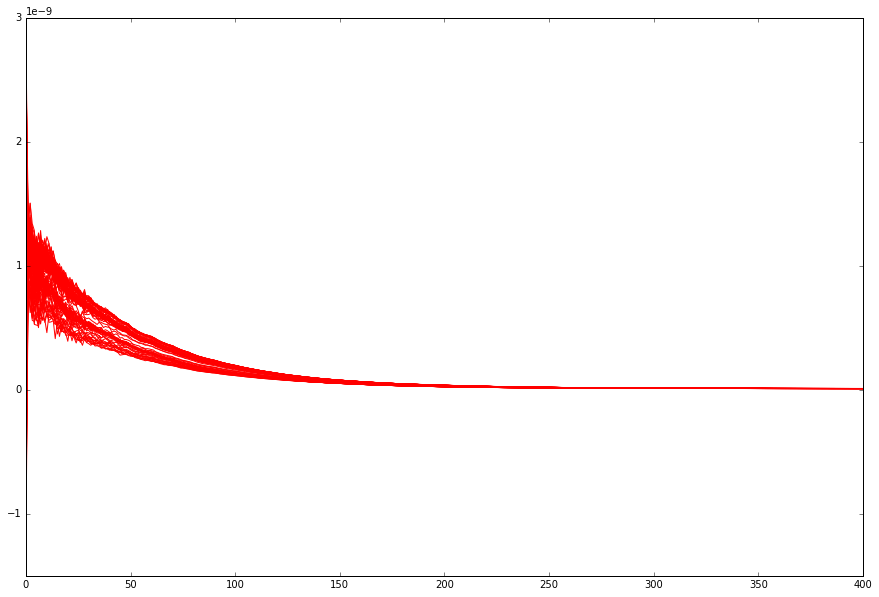

In [45]:
#Plot a few rows of the data

imaginary = 0

for row in range(UterusCaseA.size):
    CancerModel.plotSample(UterusCaseA,row,'red',imaginary)
plt.show()

In [46]:
thisRow = CancerModel.train(UterusCaseA,[99])
thisRow2 = CancerModel2.train(UterusCaseA,[99])
thisRow3 = CancerModel3.train(UterusCaseA,[99])
thisRow4 = CancerModel4.train(UterusCaseA,[99])
print UterusCaseA.getAllY()[99],CancerModel.predict(thisRow),CancerModel2.predict(thisRow2),CancerModel3.predict(thisRow3),CancerModel4.predict(thisRow4)

[0.98936543481297423, 0.010452916661428772, 0.00010433617065697305, 3.6367300710960384e-05, 1.4197974000727218e-05, 8.5303746213510382e-06, 5.3283459209919738e-06, 3.8247017210515053e-06, 3.3345044514718767e-06, 2.9418310090746123e-06, 2.7873225043247959e-06]
5 [('5', 0.99999974028300431)] [('5', 1.0)] [('5', 0.842392552309359)] [('5', 0.9353031945043113)]


In [15]:
thisRow = CancerModel.train(UterusCaseB,[0])
thisRow2 = CancerModel2.train(UterusCaseB,[0])
thisRow3 = CancerModel3.train(UterusCaseB,[0])
thisRow4 = CancerModel4.train(UterusCaseB,[0])
print UterusCaseB.getAllY()[0],CancerModel.predict(thisRow),CancerModel2.predict(thisRow2),CancerModel3.predict(thisRow3),CancerModel3.predict(thisRow4)

[1.1208752856066531e-12, 0.73112343347322828, 0.12625906352872274, 0.052919214434907463, 0.029293516349353808, 0.018745218665915001, 0.013213185836008055, 0.0098662690903146485, 0.0075959200345996573, 0.0060709280227630247, 0.0049132505630666611]
[0.9847431156488784, 0.014982206612588509, 0.00023473987891858142, 1.7654218924442171e-05, 6.8548989550949777e-06, 3.7512962983483625e-06, 2.9778113035191763e-06, 2.3455175243786011e-06, 2.1656038666611807e-06, 2.268437579072746e-06, 1.9200751628432687e-06]
Healthy [('Healthy', 1.0)] [('Healthy', 1.0)] [('Healthy', 0.9950847664118591)] [('Healthy', 0.9950847664118591)]


In [16]:
thisRow = CancerModel.train(KidneySectionB,[13])
thisRow2 = CancerModel2.train(KidneySectionB,[13])
thisRow3 = CancerModel3.train(KidneySectionB,[13])
thisRow4 = CancerModel4.train(KidneySectionB,[13])
print KidneySectionB.getAllY()[13],CancerModel.predict(thisRow),CancerModel2.predict(thisRow2),CancerModel3.predict(thisRow3),CancerModel4.predict(thisRow4)

[2.8490812590513594e-12, 0.65684468860376188, 0.15913171305496088, 0.066780287472503572, 0.037380347598483514, 0.024069120481619598, 0.017790240541728519, 0.013346105683998397, 0.010007882133199581, 0.0079808721384514846, 0.0066687422884433743]
[0.98749230596603366, 0.011983873548674029, 0.00038190170839204471, 5.5547787271410452e-05, 2.4952626513026189e-05, 1.6094448516416029e-05, 1.2680505152851363e-05, 9.2492682457386733e-06, 8.1291696976524412e-06, 7.8778030398822931e-06, 7.3871684633598821e-06]
Cancer [('Cancer', 1.0)] [('Cancer', 0.99997705965685713)] [('Cancer', 0.9893111703964349)] [('Cancer', 0.7887759375197656)]


In [9]:
for row in range(KidneySectionC.size):
    thisRow = CancerModel.train(KidneySectionC,[row])
    thisRow2 = CancerModel2.train(KidneySectionC,[row])
    thisRow3 = CancerModel3.train(KidneySectionC,[row])
    thisRow3 = CancerModel4.train(KidneySectionC,[row])
    print KidneySectionC.getAllY()[row],CancerModel.predict(thisRow),CancerModel2.predict(thisRow2),CancerModel3.predict(thisRow3),CancerModel4.predict(thisRow4)

Cancer [('1', 1.0)] [('1', 0.99999999999188471)] [('1', 0.7637021698713785)] [('1', 0.9986962419401841)]
Cancer [('Cancer', 1.0)] [('Cancer', 0.96046239208947903)] [('Cancer', 0.9816498503614257)] [('1', 0.7770267303177113)]
Cancer [('Cancer', 1.0)] [('Cancer', 0.99389841049002492)] [('Cancer', 0.979943513162634)] [('1', 0.7610361522632195)]
Cancer [('Cancer', 0.99998694908387453)] [('1', 0.9999862337328036)] [('Cancer', 0.5486983535899457)] [('1', 0.7669825664934576)]
1 [('1', 0.9999999999817577)] [('1', 0.99999999948918539)] [('1', 0.8464293362812483)] [('1', 0.7666258510210832)]
1 [('1', 1.0)] [('Cancer', 1.0)] [('1', 0.9804394988978901)] [('1', 0.695607208125739)]
1 [('1', 0.99999999999979439)] [('1', 0.99999999999999845)] [('1', 0.930561176811497)] [('1', 0.7721874073059602)]
1 [('Cancer', 1.0)] [('Cancer', 0.7795051207045075)] [('Cancer', 0.8844470448468267)] [('1', 0.6398475030641774)]
2 [('Cancer', 1.0)] [('Cancer', 0.99937076943355618)] [('Cancer', 0.99354153326101)] [('1', 0.

In [10]:
CancerModel.train(UterusCaseA)
print CancerModel.test(UterusCaseA)
CancerModel2.train(UterusCaseA)
print CancerModel2.test(UterusCaseA)
CancerModel3.train(UterusCaseA)
print CancerModel3.test(UterusCaseA)
CancerModel4.train(UterusCaseA)
print CancerModel4.test(UterusCaseA)
print ''

CancerModel.train(UterusCaseB)
print CancerModel.test(UterusCaseB)
CancerModel2.train(UterusCaseB)
print CancerModel2.test(UterusCaseB)
CancerModel3.train(UterusCaseB)
print CancerModel3.test(UterusCaseB)
CancerModel4.train(UterusCaseB)
print CancerModel4.test(UterusCaseB)
print ''

CancerModel.train(KidneySectionB)
print CancerModel.test(KidneySectionB)
CancerModel2.train(KidneySectionB)
print CancerModel2.test(KidneySectionB)
CancerModel3.train(KidneySectionB)
print CancerModel3.test(KidneySectionB)
CancerModel4.train(KidneySectionB)
print CancerModel4.test(KidneySectionB)
print ''

CancerModel.train(KidneySectionC)
print CancerModel.test(KidneySectionC)
CancerModel2.train(KidneySectionC)
print CancerModel2.test(KidneySectionC)
CancerModel3.train(KidneySectionC)
print CancerModel3.test(KidneySectionC)
CancerModel4.train(KidneySectionC)
print CancerModel4.test(KidneySectionC)

0.960000402432
0.994926908364
0.936517361725
0.833611084554

0.791559974184
0.8
0.768879918909
0.798703798908

0.928473184644
0.86307167249
0.872511633179
0.705653328835

0.7142795591
0.512489741807
0.64514965376
0.487836135779


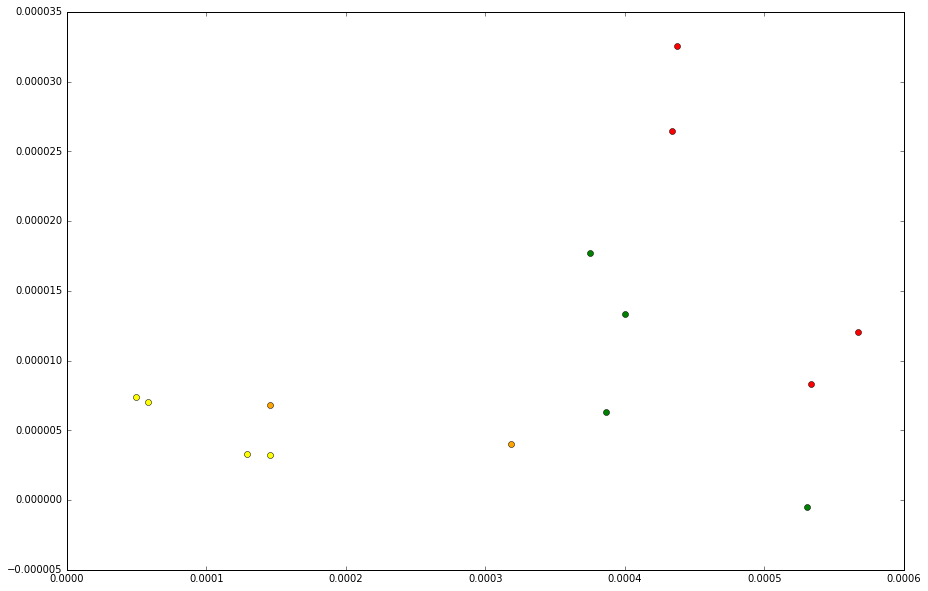

In [49]:
classes = sorted(list(set(KidneySectionC.getAllY())))
colors = ['red','orange','yellow','green','blue']
for i in range(len(classes)):
    x = []
    y = []
    for row in range(len(KidneySectionC.getAllFeatures()[0])):
        if KidneySectionC.getAllY()[row] == classes[i]:
            x.append(KidneySectionC.getFeaturesBySweep(row,0,1)[0])
            y.append(KidneySectionC.getFeaturesBySweep(row,0,1)[1])
    plt.plot(x,y,color=colors[i],marker='o',linewidth=0)

plt.show()

0.0135496653359 0.000343824719483


AttributeError: 'module' object has no attribute 'append'

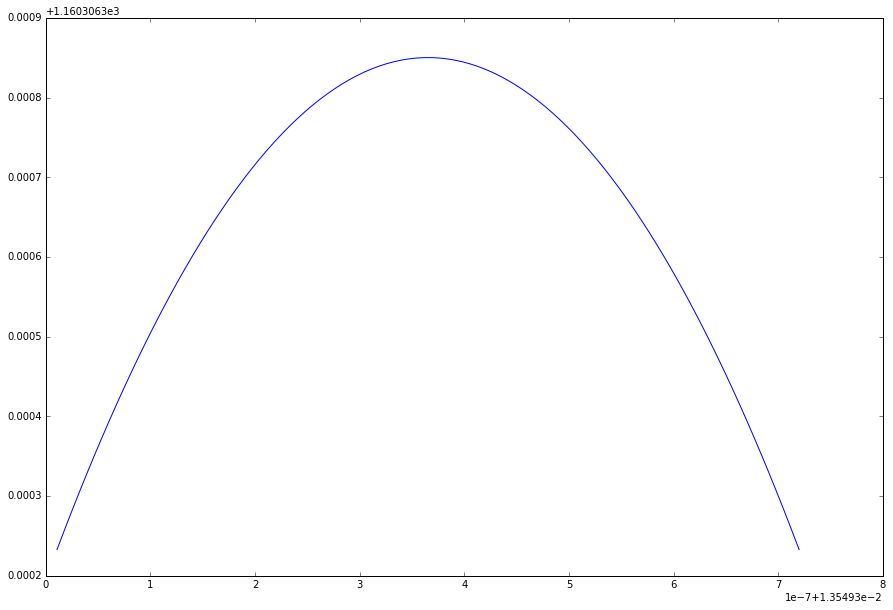

In [355]:
SoundModel.train(SoundData)
#SoundModel2.train(Sound2Data)

#UterusModel.train(UterusA)


mu = float(np.real(SoundModel.L.means[0][0][1][0]))
variance = float(np.real(SoundModel.L.variances[0][0][1][0]))
sigma = np.sqrt(variance)

print mu,sigma

x = np.linspace(mu-3*variance,mu+3*variance, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))

x = []
y = []
for row in range(80):
    if SoundData.getAllY()[row] == "Flugel":
        a.append()

plt.show()

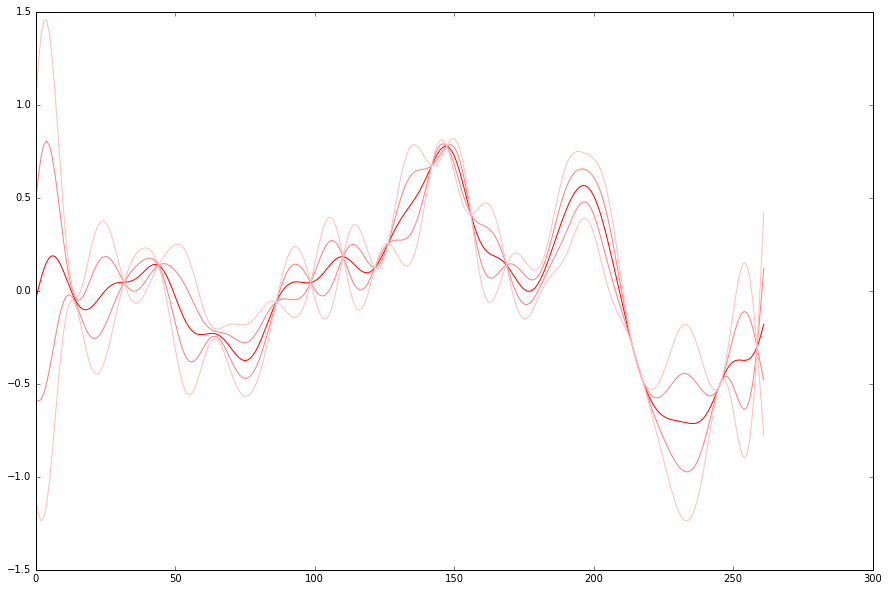

In [314]:
# SoundModel.plotDistributionByClassification("Flugel","#ff0000",263)
# SoundModel.plotDistributionByClassification("Trumpet1","#0000ff",263)
# SoundModel.plotDistributionByClassification("Trumpet2","#ff7700",263)
# SoundModel.plotDistributionByClassification("Clarinet","#00ff00",263)
# SoundModel.plotSample(FlugelData,13,'black')

# plt.show()

SoundModel2.plotDistributionByClassification("Piano","#ff0000",263)
#SoundModel2.plotDistributionByClassification("Trumpet1","#0000ff",263)
#SoundModel2.plotDistributionByClassification("Trumpet2","#ff7700",263)
#SoundModel2.plotDistributionByClassification("Clarinet","#00ff00",263)
#SoundModel.plotSample(FlugelData,13,'black')

#newData = SoundModel2.genData('Flugel',10)
#for i in range(10):
#    SoundModel2.plotApproximation(newData,i,'red')

plt.show()